# Details

In [130]:
import pandas as pd
import numpy as np

In [131]:
# read all cleaned tables
box_scores = pd.read_csv("../phase2/cleaned-data/box_scores_2010_2017.csv").drop(columns=["Unnamed: 0"])
game_data = pd.read_csv("../phase2/cleaned-data/nfl_game_data_2010_2023.csv").drop(columns=["Unnamed: 0"])
team_stats = pd.read_csv("../phase2/cleaned-data/nfl_team_stats_2010_2021.csv").drop(columns=["Unnamed: 0"])
nfl_teams = pd.read_csv("../phase2/cleaned-data/nfl_teams_info.csv").drop(columns=["Unnamed: 0"])

## Setting Up Data

In [132]:
# adding values for the St. Louis Rams and Las Vegas Raiders as they show up in the other datasets
rams = pd.DataFrame({"team_name": "St. Louis Rams", "team_name_short": "Rams", "team_id": "LAR", "team_conference": "NFC", "team_division": "NFC West"}, index=[0])
raiders = pd.DataFrame({"team_name": "Las Vegas Raiders", "team_name_short": "Raiders", "team_id": "LVR", "team_conference": "AFC", "team_division": "AFC West"}, index=[0])
nfl_teams = pd.concat([nfl_teams, rams, raiders], ignore_index=True)
nfl_teams = nfl_teams.sort_values(by=["team_division"]).reset_index(drop=True)
nfl_teams.head()

,team_name,team_name_short,team_id,team_conference,team_division
0,New England Patriots,Patriots,NE,AFC,AFC East
1,Buffalo Bills,Bills,BUF,AFC,AFC East
2,Miami Dolphins,Dolphins,MIA,AFC,AFC East
3,New York Jets,Jets,NYJ,AFC,AFC East
4,Baltimore Ravens,Ravens,BAL,AFC,AFC North


In [133]:
# function to get team id from city/team name
def get_team_id(city):
    # find the team name 
    for team in nfl_teams["team_name"]:
        if city in team:
            return nfl_teams[nfl_teams["team_name"] == team]["team_id"].values[0]
        elif city == "NY Giants":
            return "NYG"
        elif city == "NY Jets":
            return "NYJ"
        elif city == "LA Rams":
            return "LAR"
        elif city == "LA Chargers":
            return "LAC"

In [134]:
# adding team ids to the box scores dataset
box_scores["home_id"] = box_scores["home"].apply(get_team_id)
box_scores["away_id"] = box_scores["visitor"].apply(get_team_id)

box_scores.head()

,date,visitor,home,visitor_score,home_score,visitor_first_downs,visitor_net_yards,visitor_total_plays,visitor_avg_gain,visitor_time_of_possession,home_first_downs,home_net_yards,home_total_plays,home_avg_gain,home_time_of_possession,home_id,away_id
0,2014-09-07,Cleveland,Pittsburgh,27,30,23,389,64,6.1,27:33,24,503,67,7.5,32:27,PIT,CLE
1,2014-09-07,Jacksonville,Philadelphia,17,34,18,306,70,4.4,29:14,24,420,82,5.1,30:46,PHI,JAX
2,2014-09-04,Green Bay,Seattle,16,36,19,255,57,4.5,26:40,25,398,66,6.0,33:20,SEA,GB
3,2014-09-07,Minnesota,St. Louis,34,6,18,355,57,6.2,28:17,15,318,63,5.0,31:43,LAR,MIN
4,2014-09-07,Cincinnati,Baltimore,23,16,16,380,64,5.9,30:30,26,423,85,5.0,29:30,BAL,CIN


In [135]:
# adding team ids to the game data dataset
game_data["home_id"] = game_data["team_home"].apply(get_team_id)
game_data["away_id"] = game_data["team_away"].apply(get_team_id)

game_data.head()

,schedule_date,schedule_season,schedule_week,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,stadium,weather_temperature,weather_wind_mph,home_id,away_id
0,2010-09-09,2010,1,New Orleans Saints,14.0,9.0,Minnesota Vikings,NO,-5.0,Louisiana Superdome,72.0,0.0,NO,MIN
1,2010-09-12,2010,1,Buffalo Bills,10.0,15.0,Miami Dolphins,MIA,-3.0,Ralph Wilson Stadium,64.0,7.0,BUF,MIA
2,2010-09-12,2010,1,Chicago Bears,19.0,14.0,Detroit Lions,CHI,-6.5,Soldier Field,75.0,1.0,CHI,DET
3,2010-09-12,2010,1,Houston Texans,34.0,24.0,Indianapolis Colts,IND,-1.0,Reliant Stadium,89.0,5.0,HOU,IND
4,2010-09-12,2010,1,Jacksonville Jaguars,24.0,17.0,Denver Broncos,JAX,-3.0,EverBank Field,91.0,1.0,JAX,DEN


## Joining Data

In [136]:
# merge the box scores and game data using inner join on date and home/away id
box_game_data_merged = pd.merge(box_scores, game_data, how="inner", left_on=["date", "home_id", "away_id"], right_on=["schedule_date", "home_id", "away_id"])
box_game_data_merged.head()

,date,visitor,home,visitor_score,home_score,visitor_first_downs,visitor_net_yards,visitor_total_plays,visitor_avg_gain,visitor_time_of_possession,...,schedule_week,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,stadium,weather_temperature,weather_wind_mph
0,2014-09-07,Cleveland,Pittsburgh,27,30,23,389,64,6.1,27:33,...,1,Pittsburgh Steelers,30.0,27.0,Cleveland Browns,PIT,-5.5,Heinz Field,72.0,6.0
1,2014-09-07,Jacksonville,Philadelphia,17,34,18,306,70,4.4,29:14,...,1,Philadelphia Eagles,34.0,17.0,Jacksonville Jaguars,PHI,-10.0,Lincoln Financial Field,80.0,6.0
2,2014-09-04,Green Bay,Seattle,16,36,19,255,57,4.5,26:40,...,1,Seattle Seahawks,36.0,16.0,Green Bay Packers,SEA,-4.5,CenturyLink Field,70.0,5.0
3,2014-09-07,Minnesota,St. Louis,34,6,18,355,57,6.2,28:17,...,1,St. Louis Rams,6.0,34.0,Minnesota Vikings,LAR,-3.0,Edward Jones Dome,72.0,0.0
4,2014-09-07,Cincinnati,Baltimore,23,16,16,380,64,5.9,30:30,...,1,Baltimore Ravens,16.0,23.0,Cincinnati Bengals,BAL,-1.0,M&T Bank Stadium,78.0,0.0


In [137]:
# sort the merged dataset by date
box_game_data_merged = box_game_data_merged.sort_values(by=["date"]).reset_index(drop=True)
box_game_data_merged.head()

,date,visitor,home,visitor_score,home_score,visitor_first_downs,visitor_net_yards,visitor_total_plays,visitor_avg_gain,visitor_time_of_possession,...,schedule_week,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,stadium,weather_temperature,weather_wind_mph
0,2010-09-09,Minnesota,New Orleans,9,14,12,253,51,5.0,26:17,...,1,New Orleans Saints,14.0,9.0,Minnesota Vikings,NO,-5.0,Louisiana Superdome,72.0,0.0
1,2010-09-12,Indianapolis,Houston,24,34,25,463,69,6.7,29:07,...,1,Houston Texans,34.0,24.0,Indianapolis Colts,IND,-1.0,Reliant Stadium,89.0,5.0
2,2010-09-12,Detroit,Chicago,14,19,13,168,57,2.9,25:18,...,1,Chicago Bears,19.0,14.0,Detroit Lions,CHI,-6.5,Soldier Field,75.0,1.0
3,2010-09-12,Arizona,St. Louis,17,13,21,378,64,5.9,27:09,...,1,St. Louis Rams,13.0,17.0,Arizona Cardinals,ARI,-3.0,Edward Jones Dome,72.0,0.0
4,2010-09-12,Carolina,NY Giants,18,31,14,237,63,3.8,25:21,...,1,New York Giants,31.0,18.0,Carolina Panthers,NYG,-6.0,MetLife Stadium,65.0,1.0


In [138]:
# drop unnecessary columns
box_game_data_merged = box_game_data_merged.drop(columns=["schedule_date", "visitor", "home", "visitor_score", "home_score"])
box_game_data_merged.head()

,date,visitor_first_downs,visitor_net_yards,visitor_total_plays,visitor_avg_gain,visitor_time_of_possession,home_first_downs,home_net_yards,home_total_plays,home_avg_gain,...,schedule_week,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,stadium,weather_temperature,weather_wind_mph
0,2010-09-09,12,253,51,5.0,26:17,18,308,62,5.0,...,1,New Orleans Saints,14.0,9.0,Minnesota Vikings,NO,-5.0,Louisiana Superdome,72.0,0.0
1,2010-09-12,25,463,69,6.7,29:07,23,355,61,5.8,...,1,Houston Texans,34.0,24.0,Indianapolis Colts,IND,-1.0,Reliant Stadium,89.0,5.0
2,2010-09-12,13,168,57,2.9,25:18,23,463,70,6.6,...,1,Chicago Bears,19.0,14.0,Detroit Lions,CHI,-6.5,Soldier Field,75.0,1.0
3,2010-09-12,21,378,64,5.9,27:09,20,325,81,4.0,...,1,St. Louis Rams,13.0,17.0,Arizona Cardinals,ARI,-3.0,Edward Jones Dome,72.0,0.0
4,2010-09-12,14,237,63,3.8,25:21,21,376,67,5.6,...,1,New York Giants,31.0,18.0,Carolina Panthers,NYG,-6.0,MetLife Stadium,65.0,1.0


In [139]:
# convert time of possession to a float for minutes
def convert_time_to_float(time):
  if time == "None":
    return 0
  else:
    time_split = time.split(":")
    return float(time_split[0]) + float(time_split[1])/60

In [140]:
box_game_data_merged["visitor_time_of_possession"] = box_game_data_merged["visitor_time_of_possession"].apply(convert_time_to_float)
box_game_data_merged["home_time_of_possession"] = box_game_data_merged["home_time_of_possession"].apply(convert_time_to_float)

In [141]:
def get_winner_id(row):
    if row["score_home"] > row["score_away"]:
      return 0
    elif row["score_home"] < row["score_away"]:
      return 1
    else:
      return 2

In [142]:
# apply the get_winner_id function to the merged dataset
box_game_data_merged["winner_id"] = box_game_data_merged.apply(get_winner_id, axis=1)
box_game_data_merged.head()

,date,visitor_first_downs,visitor_net_yards,visitor_total_plays,visitor_avg_gain,visitor_time_of_possession,home_first_downs,home_net_yards,home_total_plays,home_avg_gain,...,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,stadium,weather_temperature,weather_wind_mph,winner_id
0,2010-09-09,12,253,51,5.0,26.283333,18,308,62,5.0,...,New Orleans Saints,14.0,9.0,Minnesota Vikings,NO,-5.0,Louisiana Superdome,72.0,0.0,0
1,2010-09-12,25,463,69,6.7,29.116667,23,355,61,5.8,...,Houston Texans,34.0,24.0,Indianapolis Colts,IND,-1.0,Reliant Stadium,89.0,5.0,0
2,2010-09-12,13,168,57,2.9,25.300000,23,463,70,6.6,...,Chicago Bears,19.0,14.0,Detroit Lions,CHI,-6.5,Soldier Field,75.0,1.0,0
3,2010-09-12,21,378,64,5.9,27.150000,20,325,81,4.0,...,St. Louis Rams,13.0,17.0,Arizona Cardinals,ARI,-3.0,Edward Jones Dome,72.0,0.0,1
4,2010-09-12,14,237,63,3.8,25.350000,21,376,67,5.6,...,New York Giants,31.0,18.0,Carolina Panthers,NYG,-6.0,MetLife Stadium,65.0,1.0,0


In [143]:
# convert columns to ints / floats
box_game_data_merged["score_home"] = box_game_data_merged["score_home"].astype(int)
box_game_data_merged["score_away"] = box_game_data_merged["score_away"].astype(int)
box_game_data_merged["home_first_downs"] = box_game_data_merged["home_first_downs"].astype(int)
box_game_data_merged["home_net_yards"] = box_game_data_merged["home_net_yards"].astype(int)
box_game_data_merged["home_total_plays"] = box_game_data_merged["home_total_plays"].astype(int)
box_game_data_merged["home_avg_gain"] = box_game_data_merged["home_avg_gain"].astype(float)
box_game_data_merged["visitor_first_downs"] = box_game_data_merged["visitor_first_downs"].astype(int)
box_game_data_merged["visitor_net_yards"] = box_game_data_merged["visitor_net_yards"].astype(int)
box_game_data_merged["visitor_total_plays"] = box_game_data_merged["visitor_total_plays"].astype(int)
box_game_data_merged["visitor_avg_gain"] = box_game_data_merged["visitor_avg_gain"].astype(float)

In [144]:
box_game_data_merged.columns

Index(['date', 'visitor_first_downs', 'visitor_net_yards',
       'visitor_total_plays', 'visitor_avg_gain', 'visitor_time_of_possession',
       'home_first_downs', 'home_net_yards', 'home_total_plays',
       'home_avg_gain', 'home_time_of_possession', 'home_id', 'away_id',
       'schedule_season', 'schedule_week', 'team_home', 'score_home',
       'score_away', 'team_away', 'team_favorite_id', 'spread_favorite',
       'stadium', 'weather_temperature', 'weather_wind_mph', 'winner_id'],
      dtype='object')

Most Important Columns: 'home_id', 'away_id', 'visitor_net_yards', 'visitor_time_of_possession', 'home_net_yards', 'home_time_of_possession', 'score_home', 'score_away', 'stadium'

In [145]:
def get_last_5_games_stats(team_id, date):
  last_5_games = box_game_data_merged[(box_game_data_merged["home_id"] == team_id) | (box_game_data_merged["away_id"] == team_id)]
  last_5_games = last_5_games[last_5_games["date"] < date].tail(5)
  if len(last_5_games) < 5:
    return None
  else:
    total_points_scored = 0
    total_points_allowed = 0
    total_first_downs = 0
    total_net_yards = 0
    total_total_plays = 0
    total_avg_gain = 0
    for index, row in last_5_games.iterrows():
        if row["home_id"] == team_id:
            total_points_scored += row["score_home"]
            total_points_allowed += row["score_away"]
            total_first_downs += row["home_first_downs"]
            total_net_yards += row["home_net_yards"]
            total_total_plays += row["home_total_plays"]
            total_avg_gain += row["home_avg_gain"]
        else:
            total_points_scored += row["score_away"]
            total_points_allowed += row["score_home"]
            total_first_downs += row["visitor_first_downs"]
            total_net_yards += row["visitor_net_yards"]
            total_total_plays += row["visitor_total_plays"]
            total_avg_gain += row["visitor_avg_gain"]
    return [total_points_scored/5, total_points_allowed/5, total_first_downs/5, total_net_yards/5, total_total_plays/5, total_avg_gain/5]

In [146]:
# create a new data frame that has date, home_id, away_id, home_last_5_games_stats, away_last_5_games_stats
last_5_games_stats = pd.DataFrame(columns=["date", "home_id", "away_id", "home_last_5_score", "home_last_5_allowed", "home_last_5_time_of_possession", 
                                           "home_last_5_first_downs", "home_last_5_total_plays", "home_last_5_avg_gain", "away_last_5_score", "away_last_5_allowed", 
                                           "away_last_5_time_of_possession", "away_last_5_first_downs", "away_last_5_total_plays", "away_last_5_avg_gain"])
# go through each row in the original data frame and call the get_last_5_games_stats function 
for index, row in box_game_data_merged.iterrows():
    home_last_5_games_stats = get_last_5_games_stats(row["home_id"], row["date"])
    away_last_5_games_stats = get_last_5_games_stats(row["away_id"], row["date"])
    if home_last_5_games_stats is not None and away_last_5_games_stats is not None:
        last_5_games_stats = last_5_games_stats.append({"date": row["date"], "home_id": row["home_id"], "away_id": row["away_id"], "home_last_5_score": home_last_5_games_stats[0], 
                                                        "home_last_5_allowed": home_last_5_games_stats[1], "home_last_5_time_of_possession": home_last_5_games_stats[2], 
                                                        "home_last_5_first_downs": home_last_5_games_stats[3], "home_last_5_total_plays": home_last_5_games_stats[4], 
                                                        "home_last_5_avg_gain": home_last_5_games_stats[5], "away_last_5_score": away_last_5_games_stats[0], 
                                                        "away_last_5_allowed": away_last_5_games_stats[1], "away_last_5_time_of_possession": away_last_5_games_stats[2], 
                                                        "away_last_5_first_downs": away_last_5_games_stats[3], "away_last_5_total_plays": away_last_5_games_stats[4], 
                                                        "away_last_5_avg_gain": away_last_5_games_stats[5]}, ignore_index=True)
    else:
        last_5_games_stats = last_5_games_stats.append({"date": row["date"], "home_id": row["home_id"], "away_id": row["away_id"], "home_last_5_score": None, 
                                                        "home_last_5_allowed": None, "home_last_5_time_of_possession": None, "home_last_5_first_downs": None, 
                                                        "home_last_5_total_plays": None, "home_last_5_avg_gain": None, "away_last_5_score": None, 
                                                        "away_last_5_allowed": None, "away_last_5_time_of_possession": None, "away_last_5_first_downs": None, 
                                                        "away_last_5_total_plays": None, "away_last_5_avg_gain": None}, ignore_index=True)


/var/folders/q8/mqm68gfx7pjfpqftf7y_v6140000gn/T/ipykernel_50773/2924103617.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  last_5_games_stats = last_5_games_stats.append({"date": row["date"], "home_id": row["home_id"], "away_id": row["away_id"], "home_last_5_score": None,
/var/folders/q8/mqm68gfx7pjfpqftf7y_v6140000gn/T/ipykernel_50773/2924103617.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  last_5_games_stats = last_5_games_stats.append({"date": row["date"], "home_id": row["home_id"], "away_id": row["away_id"], "home_last_5_score": None,
/var/folders/q8/mqm68gfx7pjfpqftf7y_v6140000gn/T/ipykernel_50773/2924103617.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  last_5_games_stats = last_5_games_stats.append

In [147]:
last_5_games_stats.tail()

,date,home_id,away_id,home_last_5_score,home_last_5_allowed,home_last_5_time_of_possession,home_last_5_first_downs,home_last_5_total_plays,home_last_5_avg_gain,away_last_5_score,away_last_5_allowed,away_last_5_time_of_possession,away_last_5_first_downs,away_last_5_total_plays,away_last_5_avg_gain
1912,2017-10-01,TB,NYG,21.4,22.8,19.8,315.6,59.6,5.36,13.8,23.6,16.0,323.0,60.6,5.30
1913,2017-10-01,DEN,LVR,23.2,20.6,20.2,332.4,66.2,4.98,20.2,22.8,15.4,264.2,57.0,4.64
1914,2017-10-01,SEA,IND,18.8,20.2,19.6,333.2,64.8,5.16,20.4,28.6,17.6,320.0,60.4,5.36
1915,2017-10-02,KC,WAS,29.2,20.4,20.0,356.8,55.2,6.36,24.4,20.0,18.4,376.6,62.4,6.02
1916,2017-10-05,TB,NE,22.4,22.2,20.6,347.2,60.2,5.82,32.6,31.2,27.2,448.2,73.2,6.16


In [148]:
# merge the last_5_games_stats dataset with the box_game_data_merged dataset on date, home_id, and away_id
box_game_data_merged = pd.merge(box_game_data_merged, last_5_games_stats, how="inner", left_on=["date", "home_id", "away_id"], right_on=["date", "home_id", "away_id"])
box_game_data_merged.head()

,date,visitor_first_downs,visitor_net_yards,visitor_total_plays,visitor_avg_gain,visitor_time_of_possession,home_first_downs,home_net_yards,home_total_plays,home_avg_gain,...,home_last_5_time_of_possession,home_last_5_first_downs,home_last_5_total_plays,home_last_5_avg_gain,away_last_5_score,away_last_5_allowed,away_last_5_time_of_possession,away_last_5_first_downs,away_last_5_total_plays,away_last_5_avg_gain
0,2010-09-09,12,253,51,5.0,26.283333,18,308,62,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2010-09-12,25,463,69,6.7,29.116667,23,355,61,5.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2010-09-12,13,168,57,2.9,25.300000,23,463,70,6.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2010-09-12,21,378,64,5.9,27.150000,20,325,81,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2010-09-12,14,237,63,3.8,25.350000,21,376,67,5.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Train Model

In [149]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

### Explained Model

In [150]:
df_box_game = box_game_data_merged[:1500].copy()

X_train = df_box_game[['home_id', 'away_id', 'visitor_net_yards', 'visitor_time_of_possession', 'home_net_yards', 'home_time_of_possession', 'score_home', 'score_away']]
y_train = df_box_game["winner_id"]

ct = make_column_transformer(
    (OneHotEncoder(), ['home_id', 'away_id']),
    remainder='passthrough'
)

pipeline = make_pipeline(
    ct,
    StandardScaler(with_mean=False),
    KNeighborsRegressor(n_neighbors=5)
)

grid_search = GridSearchCV(
    pipeline,
    param_grid={
        "kneighborsregressor__n_neighbors": range(1, 20),
        "kneighborsregressor__metric": ["euclidean", "manhattan"]
    },
    scoring="neg_root_mean_squared_error",
    cv=10
)

grid_search.fit(X_train, y_train)
grid_search.best_estimator_


KeyboardInterrupt: 

In [ ]:
df_cv_results = pd.DataFrame(grid_search.cv_results_)
df_cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_kneighborsregressor__metric,param_kneighborsregressor__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003564,0.000686,0.005821,0.001725,euclidean,1,"{'kneighborsregressor__metric': 'euclidean', '...",-0.577350,-0.559762,-0.605530,-0.583095,-0.571548,-0.541603,-0.565685,-0.529150,-0.535413,-0.547723,-0.561686,0.022561,38
1,0.003103,0.000148,0.005158,0.001030,euclidean,2,"{'kneighborsregressor__metric': 'euclidean', '...",-0.484768,-0.479583,-0.503322,-0.483046,-0.509902,-0.426224,-0.509902,-0.454606,-0.433974,-0.474342,-0.475967,0.028087,36
2,0.003227,0.000176,0.005667,0.001736,euclidean,3,"{'kneighborsregressor__metric': 'euclidean', '...",-0.457044,-0.470618,-0.453791,-0.479969,-0.480740,-0.414550,-0.495162,-0.426875,-0.407340,-0.446385,-0.453247,0.028090,34
3,0.003082,0.000117,0.004559,0.000802,euclidean,4,"{'kneighborsregressor__metric': 'euclidean', '...",-0.444410,-0.451848,-0.456435,-0.459619,-0.456435,-0.411805,-0.483477,-0.408758,-0.420813,-0.441116,-0.443472,0.022350,33
4,0.003038,0.000150,0.004664,0.000474,euclidean,5,"{'kneighborsregressor__metric': 'euclidean', '...",-0.435125,-0.435125,-0.430813,-0.430813,-0.449296,-0.399333,-0.453725,-0.390555,-0.402989,-0.451073,-0.427885,0.021481,31


In [ ]:
df_cv_results["param_kneighborsregressor__n_neighbors"] = df_cv_results["param_kneighborsregressor__n_neighbors"].astype("int")

df_cv_results.set_index("param_kneighborsregressor__n_neighbors", inplace = True)

param_kneighborsregressor__metric
euclidean    Axes(0.125,0.11;0.775x0.77)
manhattan    Axes(0.125,0.11;0.775x0.77)
Name: pos_mean_test_score, dtype: object

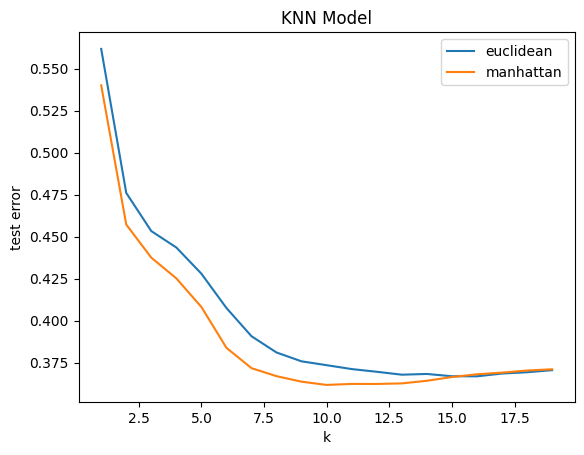

In [ ]:
df_cv_results["pos_mean_test_score"] = -df_cv_results["mean_test_score"]

(df_cv_results.groupby("param_kneighborsregressor__metric")["pos_mean_test_score"]).plot.line(xlabel = "k", ylabel = "test error", 
                                                                                                title = "KNN Model",
                                                                                                legend = True)

In [ ]:
cv_errs = -cross_val_score(grid_search.best_estimator_, X=X_train.fillna(X_train.mean()),
                            y=y_train,
                            scoring="neg_root_mean_squared_error", cv=10)

cv_errs.mean()

/var/folders/q8/mqm68gfx7pjfpqftf7y_v6140000gn/T/ipykernel_50773/2256501085.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  cv_errs = -cross_val_score(grid_search.best_estimator_, X=X_train.fillna(X_train.mean()),


0.3616783691950907

In [ ]:
df_box_game_test = box_game_data_merged[1500:].copy()

In [ ]:
y_new = pd.Series(
    grid_search.best_estimator_.predict(X=df_box_game_test[['home_id', 'away_id', 'visitor_net_yards', 'visitor_time_of_possession', 'home_net_yards', 'home_time_of_possession', 'score_home', 'score_away']]),
    index=df_box_game_test.index
)

y_new

1500    0.2
1501    0.0
1502    0.4
1503    0.6
1504    0.0
       ... 
1912    0.6
1913    0.3
1914    0.0
1915    0.0
1916    0.7
Length: 417, dtype: float64

In [ ]:
pred_vs_actual = pd.DataFrame({
    "Winner_pred": y_new,
    "Winner_actual": df_box_game_test["winner_id"],
    "Home_Team": df_box_game_test["home_id"],
    "Away_Team": df_box_game_test["away_id"]
})

pred_vs_actual["Winner_pred"] = pred_vs_actual["Winner_pred"].apply(lambda x: 0 if x < 0.5 else 1)
pred_vs_actual.count()

Winner_pred      417
Winner_actual    417
Home_Team        417
Away_Team        417
dtype: int64

In [ ]:
pred_vs_actual[pred_vs_actual["Winner_pred"] == pred_vs_actual["Winner_actual"]].count()

Winner_pred      340
Winner_actual    340
Home_Team        340
Away_Team        340
dtype: int64

### Predict Model

In [153]:
# drop rows with null values
df_prediction = box_game_data_merged.copy()
df_prediction.dropna(inplace=True)
df_prediction.shape

(1799, 37)

In [156]:
df_last_5 = df_prediction[:1500].copy()

X_train = df_last_5[['home_id', 'away_id', 'away_last_5_score', 'away_last_5_allowed', 'away_last_5_time_of_possession', 'away_last_5_first_downs', 
                     'away_last_5_total_plays', 'away_last_5_avg_gain', 'home_last_5_score', 'home_last_5_allowed', 
                     'home_last_5_time_of_possession', 'home_last_5_first_downs', 'home_last_5_total_plays', 'home_last_5_avg_gain']]
y_train = df_last_5[['score_home', 'score_away']]

ct = make_column_transformer(
    (OneHotEncoder(), ['home_id', 'away_id']),
    remainder='passthrough'
)

pipeline = make_pipeline(
    ct,
    StandardScaler(with_mean=False),
    KNeighborsRegressor(n_neighbors=5)
)

grid_search = GridSearchCV(
    pipeline,
    param_grid={
        "kneighborsregressor__n_neighbors": range(1, 100),
        "kneighborsregressor__metric": ["euclidean", "manhattan"]
    },
    scoring="neg_root_mean_squared_error",
    cv=10
)

grid_search.fit(X_train, y_train)
grid_search.best_estimator_

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['home_id', 'away_id'])])),
                ('standardscaler', StandardScaler(with_mean=False)),
                ('kneighborsregressor',
                 KNeighborsRegressor(metric='manhattan', n_neighbors=50))])

param_kneighborsregressor__metric
euclidean    Axes(0.125,0.11;0.775x0.77)
manhattan    Axes(0.125,0.11;0.775x0.77)
Name: pos_mean_test_score, dtype: object

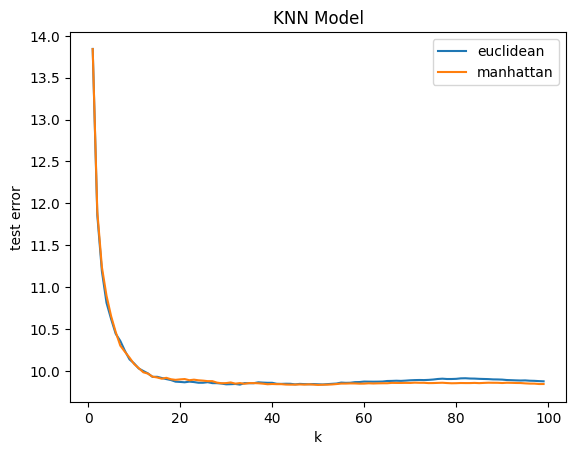

In [157]:
df_cv_results = pd.DataFrame(grid_search.cv_results_)

df_cv_results["param_kneighborsregressor__n_neighbors"] = df_cv_results["param_kneighborsregressor__n_neighbors"].astype("int")

df_cv_results.set_index("param_kneighborsregressor__n_neighbors", inplace = True)

df_cv_results["pos_mean_test_score"] = -df_cv_results["mean_test_score"]

(df_cv_results.groupby("param_kneighborsregressor__metric")["pos_mean_test_score"]).plot.line(xlabel = "k", ylabel = "test error",
                                                                                                title = "KNN Model",
                                                                                                legend = True)

In [158]:
cv_errs = -cross_val_score(grid_search.best_estimator_, X=X_train.fillna(X_train.mean()),
                            y=y_train,
                            scoring="neg_root_mean_squared_error", cv=10)

cv_errs.mean()

/var/folders/q8/mqm68gfx7pjfpqftf7y_v6140000gn/T/ipykernel_50773/5827097.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  cv_errs = -cross_val_score(grid_search.best_estimator_, X=X_train.fillna(X_train.mean()),


9.831834918186178

In [159]:
df_last_5_test = df_prediction[1500:].copy()

y_new = pd.DataFrame(
    grid_search.best_estimator_.predict(X=df_last_5_test[['home_id', 'away_id', 'away_last_5_score', 'away_last_5_allowed', 'away_last_5_time_of_possession', 'away_last_5_first_downs', 
                                                          'away_last_5_total_plays', 'away_last_5_avg_gain', 'home_last_5_score', 'home_last_5_allowed', 
                                                          'home_last_5_time_of_possession', 'home_last_5_first_downs', 'home_last_5_total_plays', 'home_last_5_avg_gain']]),
    index=df_last_5_test.index
)

y_new

,0,1
1618,25.84,21.32
1619,23.64,23.76
1620,23.24,26.70
1621,24.28,20.46
1622,23.30,24.08
...,...,...
1912,23.70,20.74
1913,25.18,19.42
1914,26.80,18.10
1915,24.00,19.76


In [161]:
# compare the predicted scores to the actual scores with the date, home team, and away team, score_home, and score_away, and the predicted scores
pred_vs_actual = pd.DataFrame({
    "Date": df_last_5_test["date"],
    "Home_Team": df_last_5_test["home_id"],
    "Away_Team": df_last_5_test["away_id"],
    "Score_Home": df_last_5_test["score_home"],
    "Score_Away": df_last_5_test["score_away"],
    "Score_Home_Pred": y_new[0],
    "Score_Away_Pred": y_new[1]
})

pred_vs_actual

,Date,Home_Team,Away_Team,Score_Home,Score_Away,Score_Home_Pred,Score_Away_Pred
1618,2016-09-18,DEN,IND,34,20,25.84,21.32
1619,2016-09-18,MIN,GB,17,14,23.64,23.76
1620,2016-09-18,LVR,ATL,28,35,23.24,26.70
1621,2016-09-18,ARI,TB,40,7,24.28,20.46
1622,2016-09-18,WAS,DAL,23,27,23.30,24.08
...,...,...,...,...,...,...,...
1912,2017-10-01,TB,NYG,25,23,23.70,20.74
1913,2017-10-01,DEN,LVR,16,10,25.18,19.42
1914,2017-10-01,SEA,IND,46,17,26.80,18.10
1915,2017-10-02,KC,WAS,29,20,24.00,19.76
